In [1]:
import pandas as pd

from xgboost import XGBClassifier

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc

df_train = pd.read_csv("train.csv")

X = df_train.drop(columns="severity")
y = df_train.severity

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

df_train = pd.read_csv("train_rev.csv")
df_test = pd.read_csv("val_rev.csv")

X_train, y_train = df_train.drop(columns='severity'), df_train.severity
X_test, y_test = df_test.drop(columns='severity'), df_test.severity

xgb_cv = GridSearchCV(
    XGBClassifier(), 
    { "n_estimators": [400, 600, 1400], 'n_jobs': [-1]}, 
    cv=15, 
    verbose=2
)

xgb_cv.fit(X_train, y_train)

xgb_bm = xgb_cv.best_estimator_

xgb_bm = XGBClassifier(n_estimators=600, n_jobs=-1)
xgb_bm.fit(X_train, y_train)

In [95]:
df = pd.read_csv("train_.csv").drop(columns='Unnamed: 0')

X = df.drop(columns="severity")
y = df.severity

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

---

In [24]:
df_train = pd.read_csv("new_data/train_t.csv").drop(columns=['Unnamed: 0'])
df_test = pd.read_csv("new_data/train_val.csv").drop(columns=['Unnamed: 0'])

X_train, y_train = df_train.drop(columns='severity'), df_train.severity
X_test, y_test = df_test.drop(columns='severity'), df_test.severity

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
X_train

,start_lat,start_lng,end_lat,end_lng,distance_mi,temperature_f,wind_chill_f,humidity_perc,pressure_in,visibility_mi,...,wind_3,wind_4,wind_5,wind_6,wind_7,wind_8,wind_9,wind_10,wind_11,wind_12
0,44.885858,-83.431474,44.888222,-83.432622,0.173,61.0,61.0,58.0,29.35,10.0,...,-0.032813,-0.180229,-0.370499,0.751225,-0.304367,-0.268540,-0.077265,0.080511,-0.002570,-0.043794
1,44.321933,-84.773441,44.322881,-84.776060,0.145,66.0,66.0,47.0,28.89,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44.232100,-92.650430,44.232100,-92.650430,0.000,11.0,-3.0,79.0,28.63,4.0,...,0.001562,0.006294,0.005510,0.000974,-0.002073,-0.006401,-0.002943,0.003934,-0.000144,-0.002865
3,34.362115,-119.309206,34.362115,-119.309206,0.000,68.0,68.0,26.0,29.82,10.0,...,-0.062598,-0.501674,0.778996,0.042569,-0.073299,-0.142432,-0.049977,0.056663,-0.001885,-0.033460
4,40.233180,-76.932770,40.233180,-76.932770,0.000,63.0,63.0,52.0,29.85,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34370,36.292681,-94.452862,36.303000,-94.450573,0.724,74.0,74.0,55.0,28.69,10.0,...,0.001562,0.006294,0.005510,0.000974,-0.002073,-0.006401,-0.002943,0.003934,-0.000144,-0.002865
34371,29.768197,-95.352706,29.768205,-95.352081,0.037,55.0,55.0,57.0,30.30,10.0,...,0.001562,0.006294,0.005510,0.000974,-0.002073,-0.006401,-0.002943,0.003934,-0.000144,-0.002865
34372,35.162882,-80.876029,35.164591,-80.875285,0.125,53.0,53.0,29.0,29.22,10.0,...,-0.014185,-0.065101,-0.073038,-0.016714,0.039525,0.186008,0.152399,-0.498129,0.714854,-0.296749
34373,40.437370,-74.142080,40.437370,-74.142080,0.000,62.0,62.0,25.0,30.03,10.0,...,0.012635,0.046886,0.036482,0.005922,-0.012257,-0.034904,-0.015068,0.019253,-0.000686,-0.013132


In [5]:
xgb_pred = xgb_final.predict(X_test)
xgb_scores = xgb_final.predict_proba(X_test)

In [7]:
from sklearn.metrics import roc_auc_score

In [27]:
# armo el vector de predicciones.
y_hat_test = xgb_final.predict_proba(X_test)[:, 1]
y_hat_train = xgb_final.predict_proba(X_train)[:, 1]

# evaluo el AUC
roc_test = roc_auc_score(y_test, y_hat_test)
roc_train = roc_auc_score(y_train, y_hat_train)
roc_test, roc_train

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

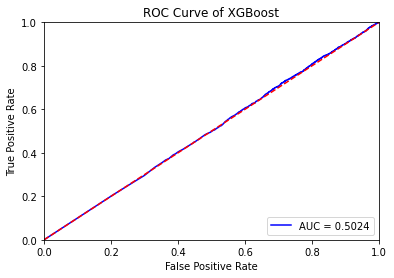

In [29]:
fpr, tpr, threshold = roc_curve(y_test, xgb_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of XGBoost')
plt.show()

In [28]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.62      0.24      0.35      7018
           1       0.39      0.76      0.52      4441

    accuracy                           0.44     11459
   macro avg       0.50      0.50      0.43     11459
weighted avg       0.53      0.44      0.41     11459



---

In [96]:
test = pd.read_csv('test4alumnos_clean.csv')

In [97]:
xgb_final = XGBClassifier(n_estimators=600, n_jobs=-1)
xgb_final.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [98]:
xgb_scores_test = xgb_final.predict_proba(test)

In [105]:
pd.DataFrame(xgb_scores_test[:,1]).to_csv("predicciones.csv")